In [14]:
from scipy.optimize import curve_fit

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tab_1 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 1')

In [4]:
tab_2 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 2')

In [5]:
tab_3 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 3')

In [6]:
tab_4 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 4')

In [8]:
# log2 function
def log2(x, a, b):
	return a * np.log2(x) + b

In [7]:
list_tabs = []
list_tabs.append(tab_1)
list_tabs.append(tab_2)
list_tabs.append(tab_3)
list_tabs.append(tab_4)

In [41]:
def find_params_plot(func, x, y, tab_name):
    
    parameters, covariance = curve_fit(func, x, y)
    
    # znajdz sekwencje zmiennej x pomiedzy manjmiejszym a najwiekszym punktem
    x_line = np.arange(min(x), max(x), 1)
    
    # znajdź predykcje dla tych puktów z x
    y_line = func(x_line, *parameters)
    
    # predykcja wszystkich punktów x
    y_pred = func(x, *parameters)
    
    # sum of squared errors
    sse = sum_squared_errors(y, y_pred)
    
    # plot input vs output
    plt.scatter(x, y)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')
    title = tab_name + ' | ' + func.__name__
    
    plt.ylabel('1+')
    plt.xlabel('GRP\n Sum squared errors: ' + str(sse) +'\n' + 'Parameters: a:' + str(parameters[0]) + '  |  b: ' + str(parameters[1]))
    
    plt.title(title)
#     plt.savefig(tab_name)
    plt.show()
    
    se = np.sqrt(np.diag(covariance))
    
    return sse

In [42]:
def sum_squared_errors(y_true, y_pred):
     sse = np.sum((y_true-y_pred)**2)
     return sse

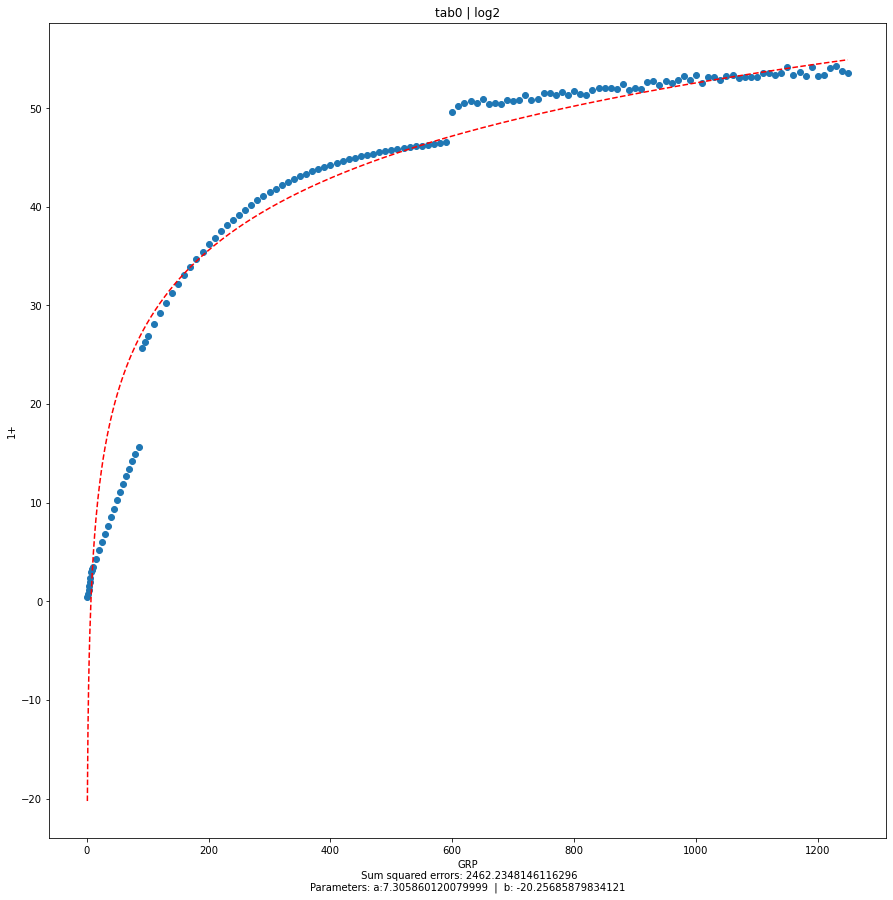

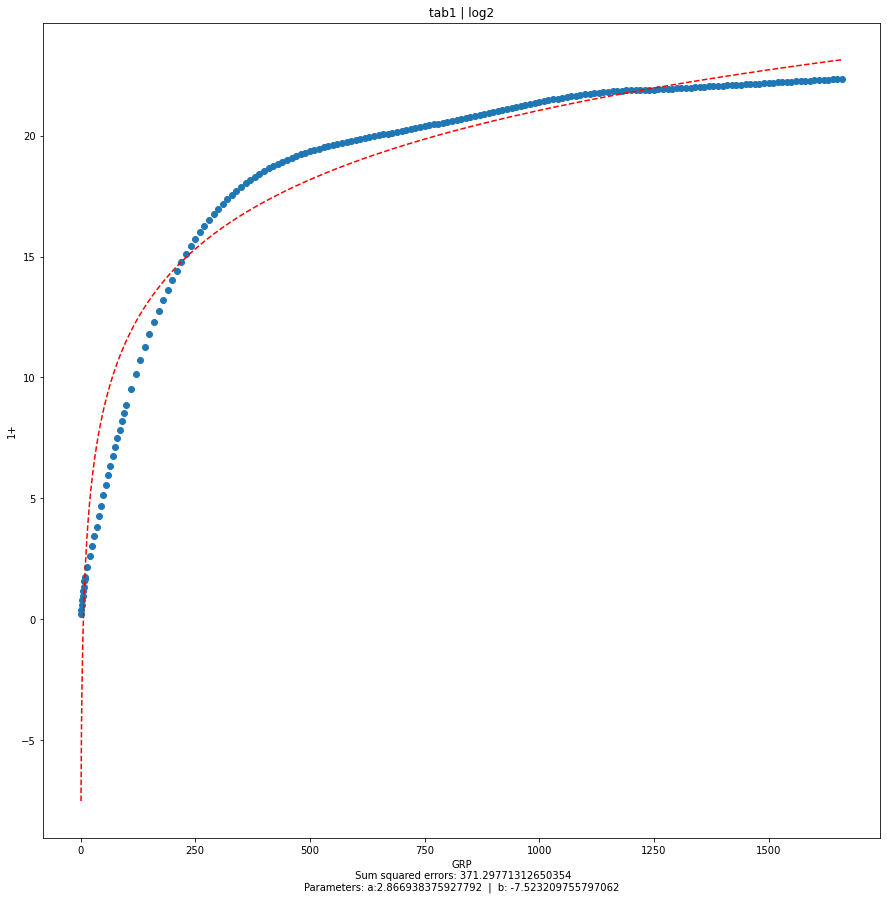

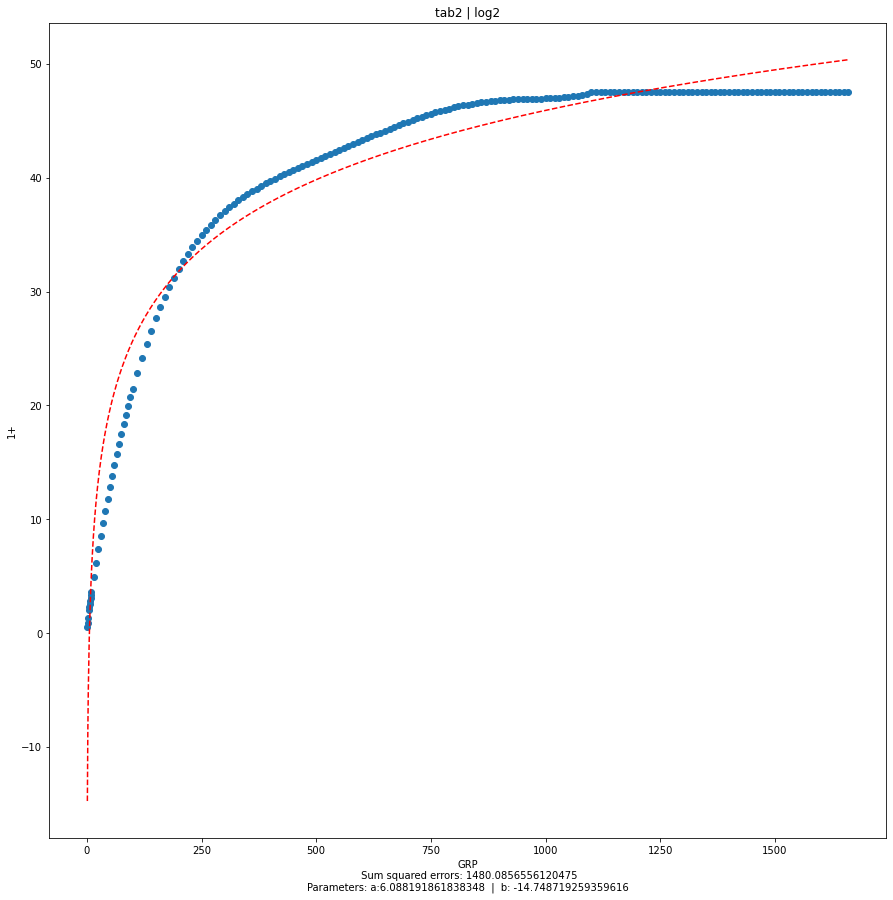

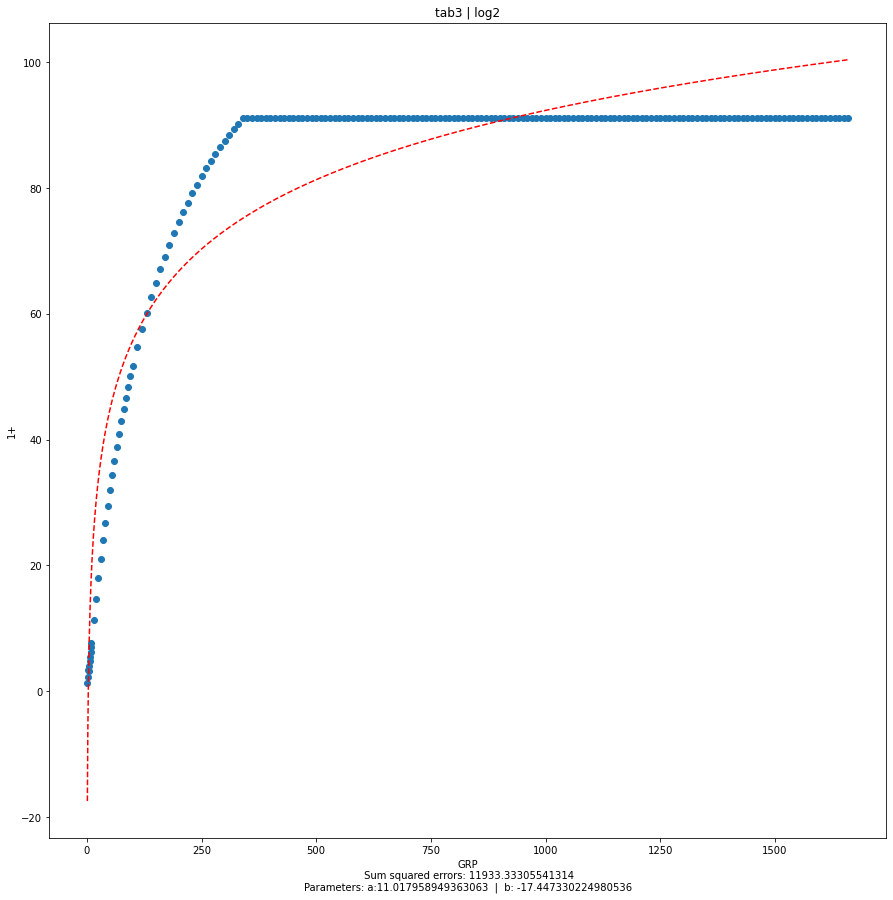

In [45]:
plt.rcParams["figure.figsize"]=15,15

i = 0
for tab in list_tabs:
    
    tab = tab[1:]
    x = tab.GRP
    y = tab['1+']
    find_params_plot(log2, x, y, 'tab' + str(i))
    i += 1